# Análisis Exploratorio de Datos (EDA) - Árbol de Regresion

En este análisis, se ha utilizado un modelo de Árbol de Regresion para predecir el gasto total de los clientes en una campaña de marketing. A continuación, se presenta el análisis exploratorio de los datos, el rendimiento del modelo y algunas visualizaciones clave.

## Carga y Preparación de los Datos

El conjunto de datos se carga desde un archivo CSV llamado `marketing_campaign_corrected.csv`. Los pasos iniciales incluyen la eliminación de valores nulos y la corrección de espacios en los nombres de las columnas.

### Creación de la columna `Total_Spending`

Se agrega una nueva columna denominada `Total_Spending`, que es la suma de varias columnas relacionadas con el gasto de los clientes en diferentes productos:

- `MntWines`
- `MntFruits`
- `MntMeatProducts`
- `MntFishProducts`
- `MntSweetProducts`
- `MntGoldProds`

### Codificación de Variables Categóricas

Se codifican las variables categóricas (`Education`, `Marital_Status`, `Dt_Customer`) utilizando el `LabelEncoder`, transformando las categorías en valores numéricos.

### Transformación Logarítmica

Se aplica una transformación logarítmica a las columnas `MntWines` y `Total_Spending` para reducir la variabilidad y mejorar la normalidad de los datos.

## Modelado

El modelo de Árbol de Decisión se entrena utilizando las variables predictoras escaladas, excluyendo las columnas no relevantes como `ID`, `Total_Spending`, `Total_Spending_log` y `MntWines`. El objetivo del modelo es predecir `Total_Spending_log`.

### División de los Datos

Los datos se dividen en conjuntos de entrenamiento y prueba, utilizando un 80% de los datos para el entrenamiento y un 20% para la prueba.

### Entrenamiento del Modelo

El modelo de Árbol de Decisión se entrena con un límite de profundidad de 6. Este parámetro se ajusta para evitar el sobreajuste, permitiendo que el modelo generalice mejor.

## Evaluación del Modelo

El rendimiento del modelo se evalúa utilizando varias métricas:

- **R² (Coeficiente de Determinación):** 0.979
- **MSE (Error Cuadrático Medio):** 0.06
- **MAE (Error Absoluto Medio):** 0.20
- **RMSE (Raíz del Error Cuadrático Medio):** 0.25

El modelo muestra un rendimiento excelente, con un `R²` de 0.979, lo que indica que el modelo es capaz de explicar el 97.1% de la variabilidad de los datos de prueba.

## Conclusión

El modelo de Árbol de Regresion ha logrado un rendimiento excelente, con un `R²` de 0.979, lo que indica que es capaz de predecir el gasto total de los clientes con gran precisión. Las visualizaciones y métricas proporcionan una comprensión profunda del comportamiento del modelo y la importancia de las características utilizadas para la predicción.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar el dataset corregido
df = pd.read_csv("marketing_campaign_corrected.csv")

# Eliminar valores nulos
df = df.dropna()

# Eliminar espacios en los nombres de columnas
df.columns = df.columns.str.strip()

# Crear la columna Total_Spending
gasto_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[gasto_cols].sum(axis=1)

# Codificación de variables categóricas
categorical_cols = ['Education', 'Marital_Status', 'Dt_Customer']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Aplicar transformación logarítmica
df['MntWines_log'] = np.log1p(df['MntWines'])  
df['Total_Spending_log'] = np.log1p(df['Total_Spending'])

# Definir variables predictoras y objetivo
X = df.drop(columns=['ID', 'Total_Spending', 'Total_Spending_log', 'MntWines'])
y = df['Total_Spending_log']

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_model.fit(X_train, y_train)

# Predicción
y_pred = tree_model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2:.3f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


R²: 0.979
MSE: 0.05
MAE: 0.17
RMSE: 0.22


## Visualizaciones

### Importancia de las Características

El gráfico a continuación muestra la importancia de las características utilizadas por el modelo para realizar las predicciones. Las características más relevantes se encuentran en la parte superior:

/var/folders/by/_c0phsdn6xl_85fftg8cd8480000gn/T/ipykernel_32632/2435852568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feature_importances, palette='viridis')


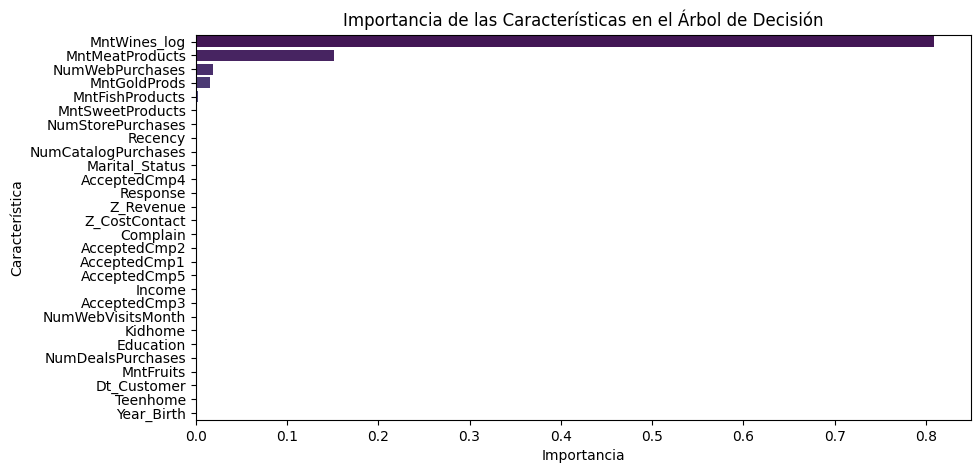

In [3]:
# Visualización de Importancia de Características
feature_importances = pd.DataFrame({'Característica': X.columns, 'Importancia': tree_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Característica', data=feature_importances, palette='viridis')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.show()

### Valores Reales vs Predichos

La siguiente visualización muestra una comparación entre los valores reales (`y_test`) y los valores predichos (`y_pred`). La línea roja discontinua representa una relación ideal donde los valores reales y predichos coinciden.

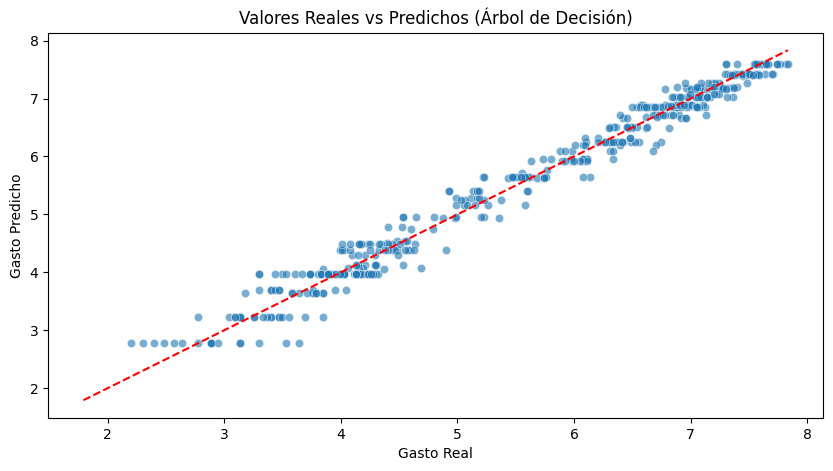

In [4]:
# Graficar valores reales vs predichos
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Gasto Real')
plt.ylabel('Gasto Predicho')
plt.title('Valores Reales vs Predichos (Árbol de Decisión)')
plt.show()

### Visualización del Árbol de Decisión

Finalmente, se presenta una visualización del árbol de decisión entrenado. El árbol tiene una profundidad máxima de 2, lo que permite interpretar fácilmente las decisiones del modelo.

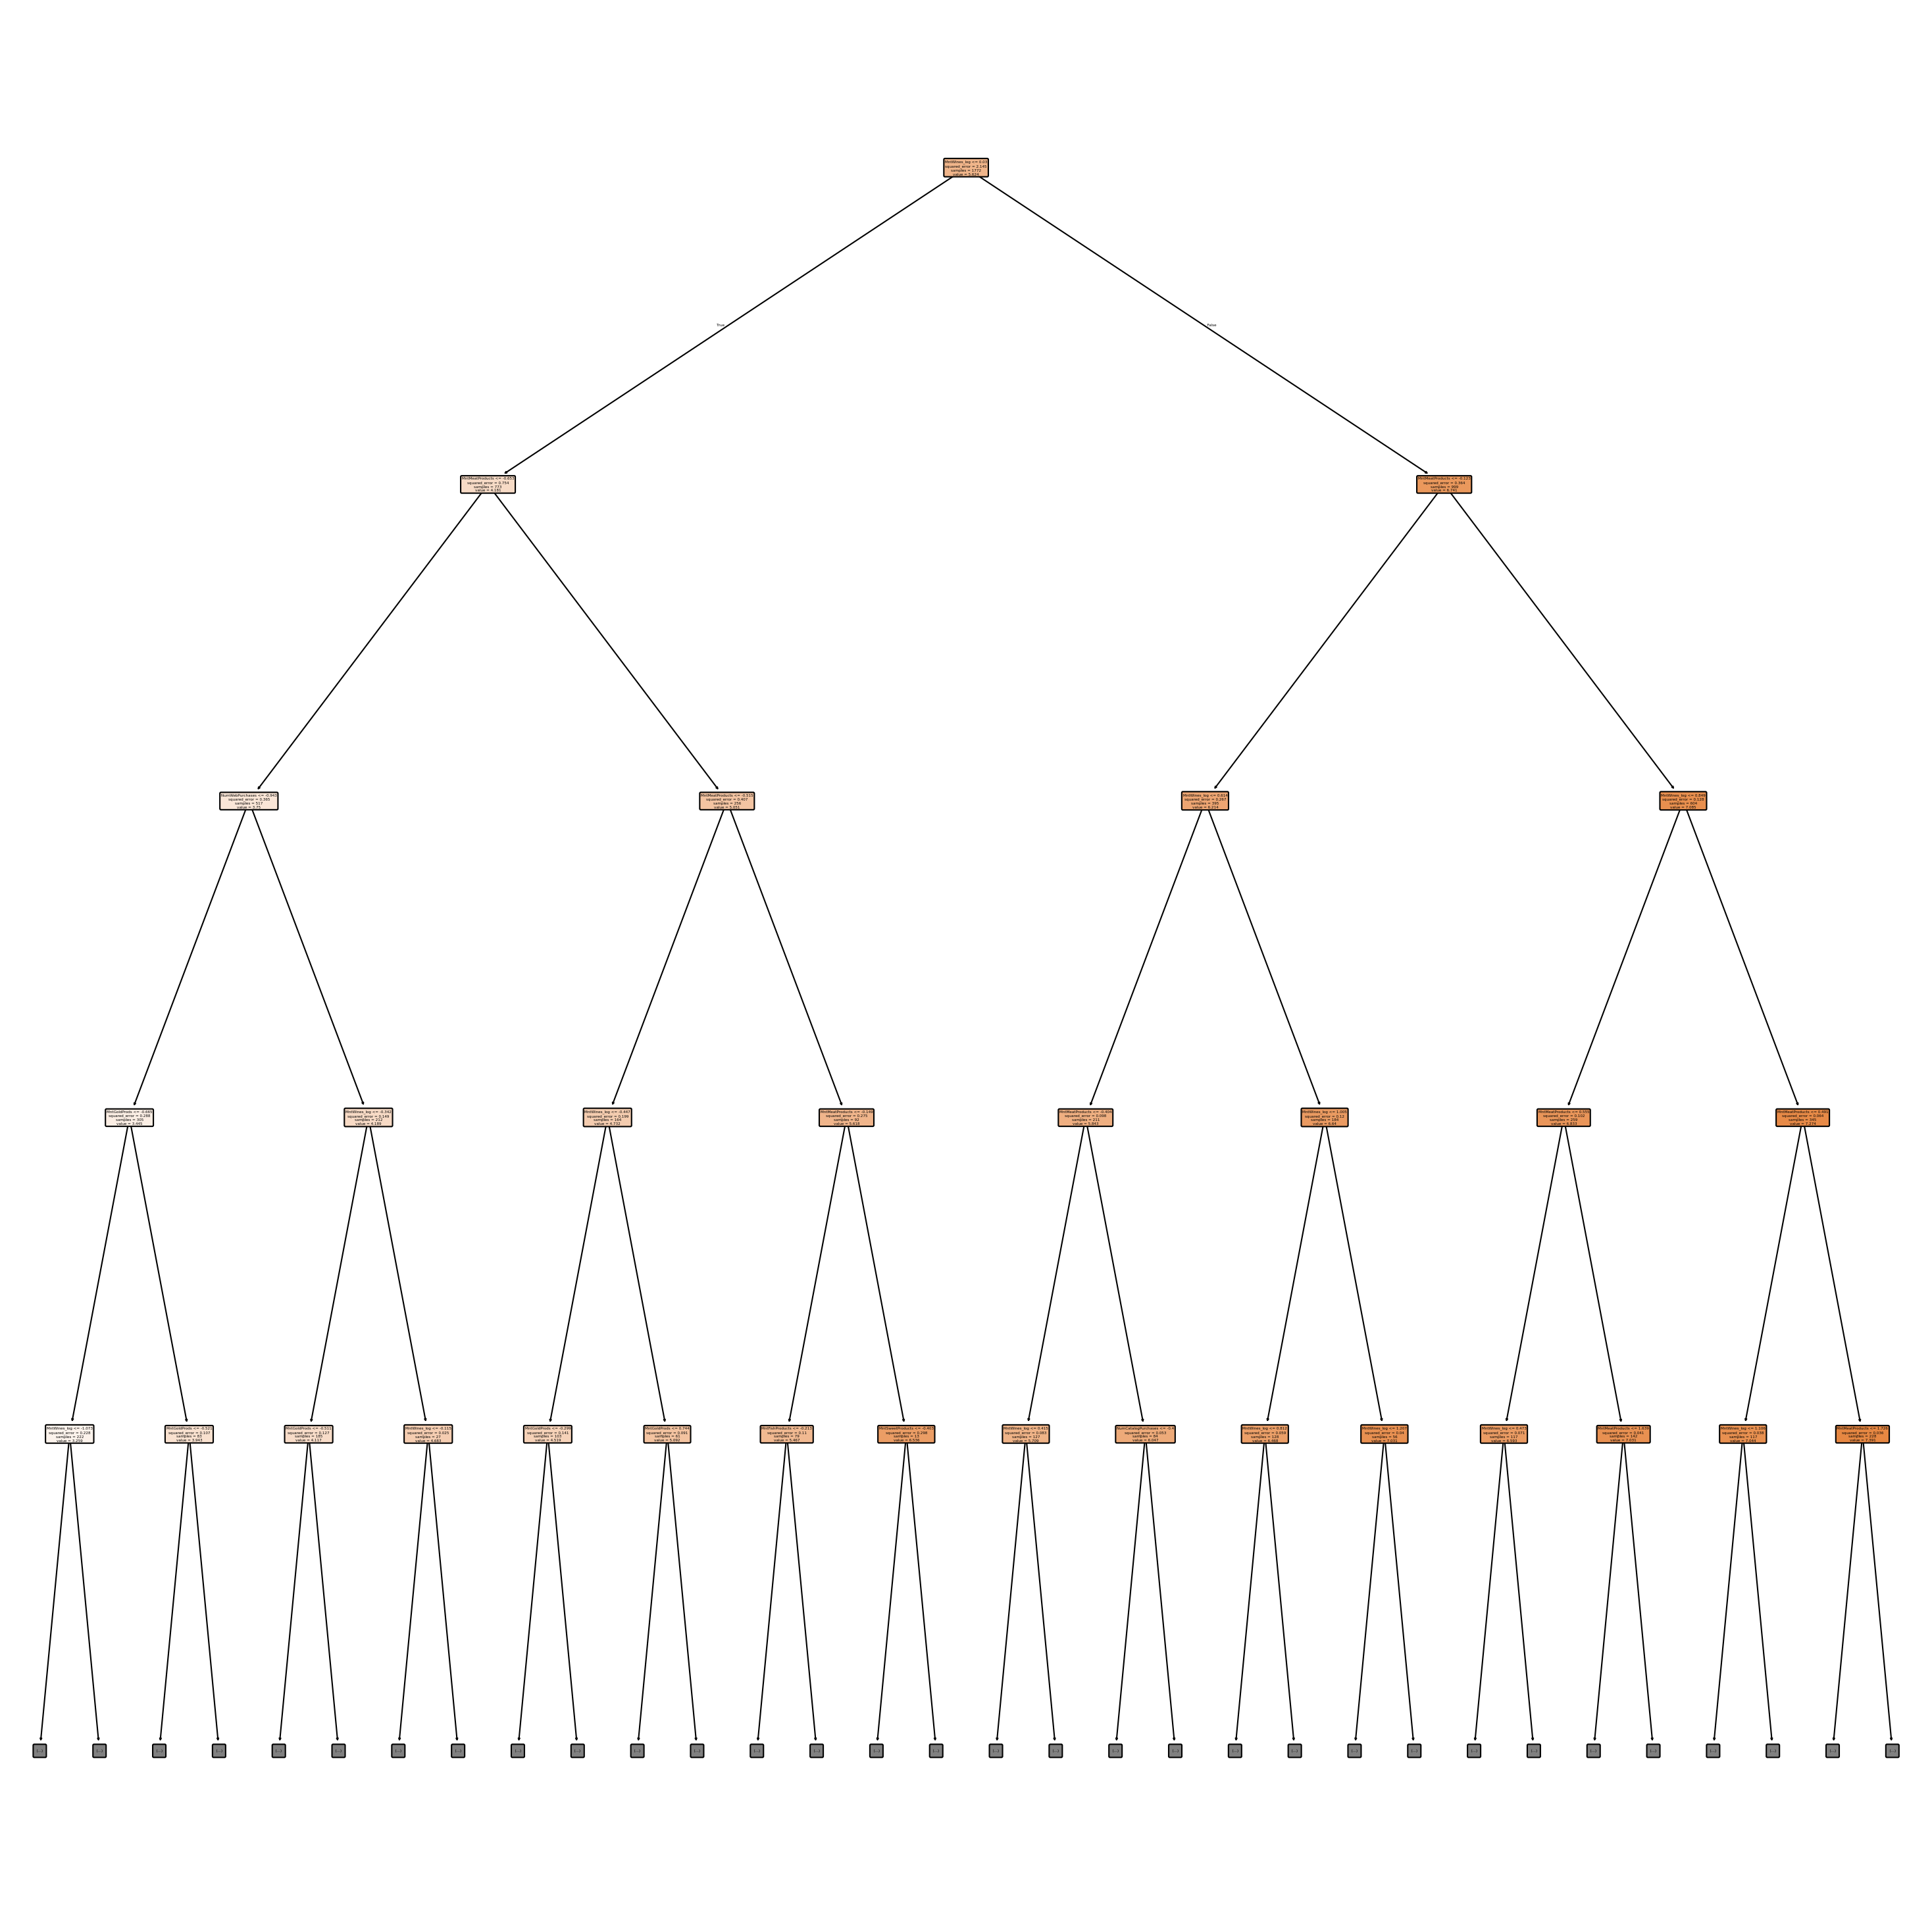

In [5]:
# Visualizar árbol
plt.figure(figsize=(25, 25), dpi=150)
plot_tree(
    tree_model,
    filled=True,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    rounded=True,
    max_depth=4
)
plt.show()